# Project 2: House Price Prediction

## Goal
Predict the median house value in California districts based on features like median income, house age, average rooms, etc.

## Dataset
We will use the **California Housing** dataset available in Scikit-Learn. It contains 20,640 samples with 8 features.

## Steps
1. Load Data
2. Exploratory Data Analysis (EDA)
3. Data Preprocessing
4. Train Model (Linear Regression)
5. Evaluate (RMSE, R2 Score)

In [35]:
# 1. Import Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 2. Load Dataset
housing_data = fetch_california_housing()
df = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
df['Target'] = housing_data.target  # The target is Median House Value (in $100,000s)

# View first 5 rows
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [36]:
# 3. Initial Inspection
print("Dataset Shape:", df.shape)
df.info()

Dataset Shape: (20640, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 2. Exploratory Data Analysis (EDA)
Let's understand the data components, distributions, and relationships.

**Note on Histogram**: Notice the spike at 5.0? The dataset caps house prices at $500,000. This is a potential issue for the model, but we will use the data as is for this exercise.

In [37]:
# 1. Statistical Summary (Mean, Min, Max, etc.)
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


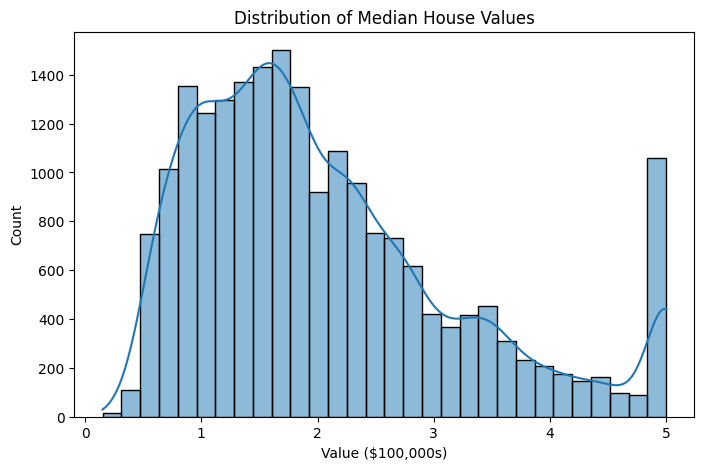

In [38]:
# 2. Visualize the Target Variable (Median House Value)
plt.figure(figsize=(8, 5))
sns.histplot(df['Target'], bins=30, kde=True)
plt.title('Distribution of Median House Values')
plt.xlabel('Value ($100,000s)')
plt.show()

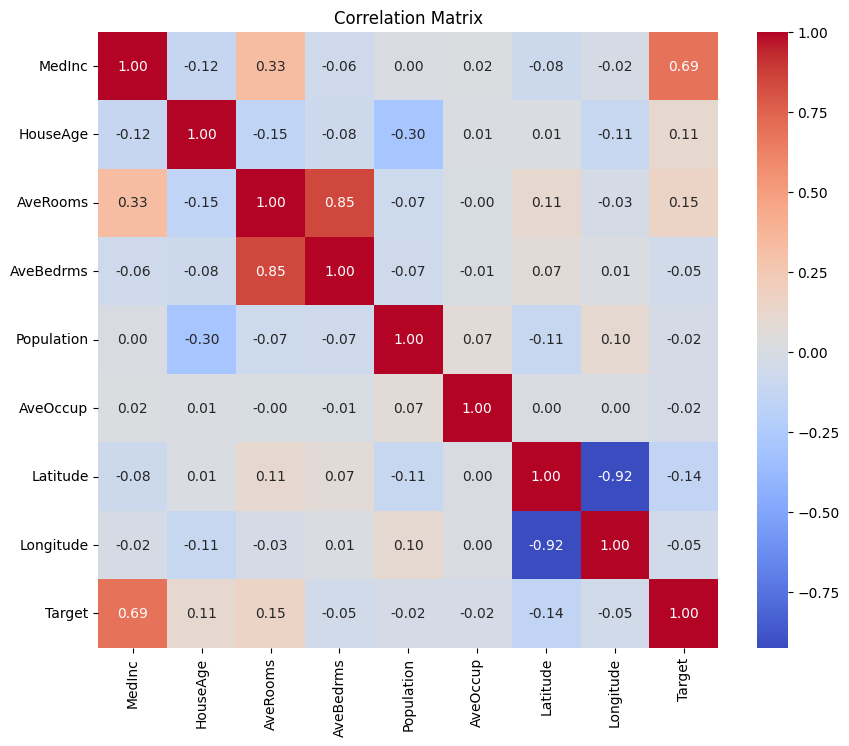

In [39]:
# 3. Check for Correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 3. Data Preprocessing
We need to:
1. Split the data into Features (X) and Target (y).
2. Split into Training and Testing sets.
3. Scale the features (Linear Regression can perform better with scaled features, though it's crucial for algorithms like SGD or SVM).

In [40]:
# Define Features (X) and Target (y)
X = df.drop('Target', axis=1)
y = df['Target']

# Split Data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training Set Shape:", X_train_scaled.shape)
print("Test Set Shape:", X_test_scaled.shape)

Training Set Shape: (16512, 8)
Test Set Shape: (4128, 8)


## 4. Model Training (Linear Regression)

In [41]:
# Initialize and Train Model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

print("Model Trained Successfully!")
print("Intercept:", lr_model.intercept_)
print("Coefficients:", lr_model.coef_)

Model Trained Successfully!
Intercept: 2.0719469373788777
Coefficients: [ 0.85438303  0.12254624 -0.29441013  0.33925949 -0.00230772 -0.0408291
 -0.89692888 -0.86984178]


## 5. Evaluation
We will evaluate using:
- **RMSE** (Root Mean Squared Error): Represents the average error in the same units as the target ($100,000s).
- **R2 Score**: How well the variance is explained (closer to 1 is better).

In [42]:
# Make Predictions
y_pred = lr_model.predict(X_test_scaled)

# Calculate Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.4f} (Avg error of ${rmse*100000:.0f})")
print(f"R2 Score: {r2:.4f}")

RMSE: 0.7456 (Avg error of $74558)
R2 Score: 0.5758


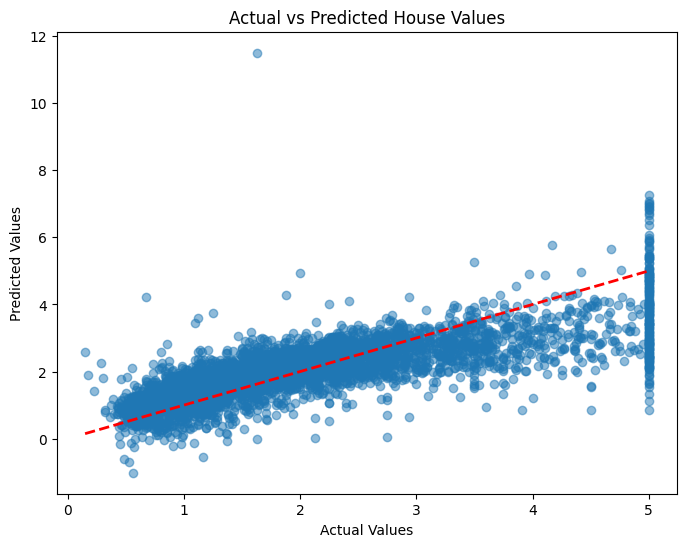

In [43]:
# Visualize Predictions vs Actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)  # Perfect prediction line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted House Values')
plt.show()